In [ ]:
print("a")

a


In [ ]:
print("b")

b


In [ ]:
a=1

In [ ]:
print(a)

1


In [ ]:
a
print("a")

a


In [ ]:
a=23

In [ ]:
a

23

In [ ]:
a= [1,2,3,4,5]
b=[1,'abc',3.0]

In [ ]:
a

[1, 2, 3, 4, 5]

In [ ]:
a[0:3]   #range from i to n-1

[1, 2, 3]

In [ ]:
a[-1]

5

In [ ]:
a[-2]

4

In [ ]:
a[0]

1

In [ ]:
b[0]

1

In [ ]:
a.append(7)

In [ ]:
a

[1, 2, 3, 4, 5, 7]

In [ ]:
a.insert(2, 9)

In [ ]:
a

[1, 2, 9, 3, 4, 5, 7]

In [ ]:
a.remove(3)
a

[1, 2, 9, 4, 5, 7]

In [ ]:
a.pop(2)


9

In [ ]:
a

[1, 2, 4, 5, 7]

In [ ]:
a.reverse()

In [ ]:
a

[7, 5, 4, 2, 1]

In [ ]:
a.extend(b)
a

[7, 5, 4, 2, 1, 1, 'abc', 3.0, 1, 'abc', 3.0]

In [ ]:
#operations with list
# append
#insert
#remove
#pop
#reverse
#extend

In [ ]:
#if else statements

In [ ]:
b=int(input("enter a  number"))
if(b%2==0):
  print("even number")
else:
  print("odd number")



enter a  number8
even number


In [ ]:
#while loops, for loops

In [ ]:

import time as p
for i in range(-10,11,2):
  print(i)
  p.sleep(0.5)

-10
-8
-6
-4
-2
0
2
4
6
8
10


In [ ]:
def my_function():
  print("Hello!")


In [ ]:
my_function()

Hello!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Regression tool used to understand and quantify the relation between 2 or more variables

Linear Regerssion
y=b0+b1x +e :
y= dependent variable
x= independent variable
b0 = constant / intercept
b1= x-slope / coefficient

LWR- created to overcome the problem of non linearly se[erable data
LWR assigns weights to data to overcome the problem
weights are assigned by kernel smoothing method
---
W=w(X,x0)= e^-(((X-x0)^^2)/(2*tau*tau))--
X = each training ip
x0= value we are predicting
W = weight matrix, diagonal matrix
tau = bandwidth parameter
we can get non-linear regression model and curve by changing the value of tau that is as strong as polynomial regression of any degree

xw= X transpose * W (dot product)

beta= (Xbar.w @ X )inverse  @ Xbar @ W @ Y---
Xbar = X transpose
@ = matrix multiplication
pinv = invert the matrix

y= beta . x0

In [18]:
def local_regression(x0,X,y,tau):
  x0=np.r_[1,x0]  # np.r_ will create a array which will contain 1 row and any no of columns
  X=np.c_[np.ones(len(X)),X] # # np.c_ will create a array which will contain 1 column and any no of rows
  xw=X.T*radial_kernal(x0,X,tau)
  beta=np.linalg.pinv(xw @ X) @xw @ y
  return x0 @ beta

In [6]:
#to understand np.r_
print(np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])])
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print(np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])])

[1 2 3 0 0 4 5 6]
[[1 4]
 [2 5]
 [3 6]]
[[1 2 3 0 0 4 5 6]]


In [19]:
def radial_kernal(x0,X,tau):
  return np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau*tau))

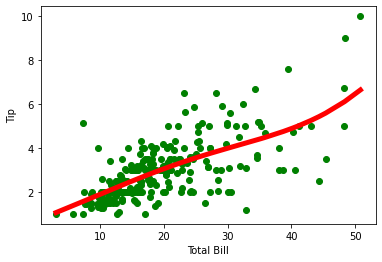

In [22]:
data=pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv")
bill=data.total_bill.values
#print(bill)
tip=data.tip.values
tau=10
ypred=np.array([local_regression(x0,bill,tip,tau)for x0 in bill])
#print("YPRED",ypred)
SortIndex= bill.argsort(0) #Return the integer indices that would sort the Series values.
xsort=bill[SortIndex]
plt.scatter(bill,tip,color='green')
plt.plot(xsort,ypred[SortIndex], color='red', linewidth=5)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [23]:
#Find S
#https://github.com/codewrestling/VTU-Machine-Learning-Lab-Programs/blob/master/1/juplab1.ipynb